# Prep the data

In [253]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})

path1 ="/Users/sjayab596/Documents/GIT_Personal_Repos/ISYE_6644_Sim/Project/Run1_DataSheet_flatfile.csv"
path2 ="/Users/sjayab596/Documents/GIT_Personal_Repos/ISYE_6644_Sim/Project/Run2_DataSheet_flatfile.csv"
path3 ="/Users/sjayab596/Documents/GIT_Personal_Repos/ISYE_6644_Sim/Project/Run3_DataSheet_flatfile.csv"

run1=pd.read_csv(path1)
run2=pd.read_csv(path2)
run3=pd.read_csv(path3)

run1['month'] = run1['month'].apply(lambda x: datetime.strptime(x, "%m").strftime("%B") if x.isdigit() else x)
run2['month'] = run2['month'].apply(lambda x: datetime.strptime(x, "%m").strftime("%B") if x.isdigit() else x)
run3['month'] = run3['month'].apply(lambda x: datetime.strptime(x, "%m").strftime("%B") if x.isdigit() else x)

In [255]:
occ_monthly1=run1
occ_monthly2=run2
occ_monthly3=run3

occ_monthly1=occ_monthly1.assign(daily_occ= lambda x: (35-x['shelter_capacity_left']))
occ_monthly2=occ_monthly2.assign(daily_occ= lambda x: (35-x['shelter_capacity_left']))
occ_monthly3=occ_monthly3.assign(daily_occ= lambda x: (35-x['shelter_capacity_left']))

#occ_monthly1.head(15)

# Occupancy over time

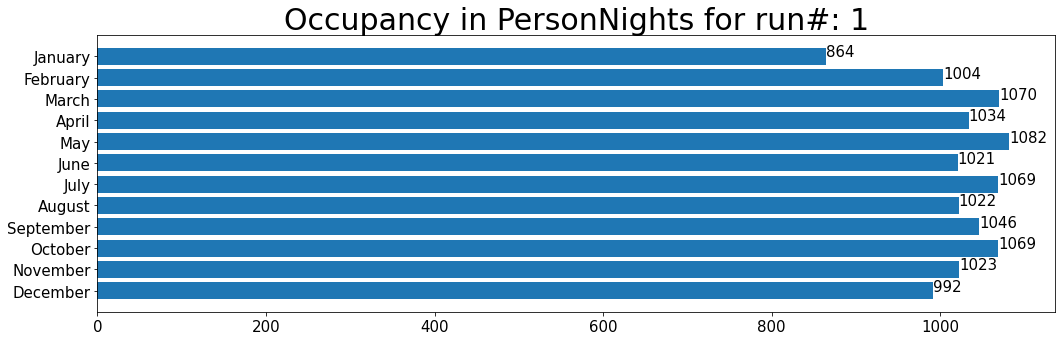

In [250]:
# Prep the data - Occupancy over months
# =====================================

occ_monthly1=run1
occ_monthly2=run2
occ_monthly3=run3

occ_monthly1=occ_monthly1.assign(daily_occ= lambda x: (35-x['shelter_capacity_left']))
occ_monthly2=occ_monthly2.assign(daily_occ= lambda x: (35-x['shelter_capacity_left']))
occ_monthly3=occ_monthly3.assign(daily_occ= lambda x: (35-x['shelter_capacity_left']))

occ_monthly1 = occ_monthly1.groupby(["run_number", "month"]).agg(monthly_occupancy =("daily_occ", "sum"))
occ_monthly2 = occ_monthly2.groupby(["run_number", "month"]).agg(monthly_occupancy =("daily_occ", "sum"))
occ_monthly3 = occ_monthly3.groupby(["run_number", "month"]).agg(monthly_occupancy =("daily_occ", "sum"))

#.agg(min_height=('height', 'min')
#occ_monthly.rename_col_by_index(0,'monthly_occupancy')
#occ_monthly=occ_monthly.rename(columns={occ_monthly.columns[0]: 'monthly_occupancy'})
occ_monthly1.reset_index(inplace=True)
occ_monthly2.reset_index(inplace=True)
occ_monthly3.reset_index(inplace=True)

occ_monthlyall = pd.concat([occ_monthly1,occ_monthly2,occ_monthly3])

occ_months1=occ_monthlyall[(occ_monthlyall['run_number'] == 1)]
occ_months2=occ_monthlyall[(occ_monthlyall['run_number'] == 2)]
occ_months3=occ_monthlyall[(occ_monthlyall['run_number'] == 3)] 
                          

months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", \
          "November", "December"]
occ_monthly1['month'] = pd.Categorical(occ_monthly1['month'], categories=months, ordered=True)
occ_monthly1=occ_monthly1.sort_values('month', ascending=False)
occ_monthly2['month'] = pd.Categorical(occ_monthly2['month'], categories=months, ordered=True)
occ_monthly2=occ_monthly2.sort_values('month', ascending=False)
occ_monthly3['month'] = pd.Categorical(occ_monthly3['month'], categories=months, ordered=True)
occ_monthly3=occ_monthly3.sort_values('month', ascending=False)
occ_monthly_mean = occ_monthlyall.groupby(["month"]).agg(monthly_occupancy =("monthly_occupancy", "mean"))
occ_monthly_mean['run_number']=0
occ_monthly_mean.reset_index(inplace=True)
occ_monthly_mean['month'] = pd.Categorical(occ_monthly_mean['month'], categories=months, ordered=True)
occ_monthly_mean=occ_monthly_mean.sort_values('month', ascending=False)




## Visualize - Over Months
# ========================

titlestr = 'Occupancy in PersonNights for run#: '+ str(occ_monthly1.loc[1,'run_number'])
plt.title(titlestr,fontsize=30)
plt.barh(occ_monthly1['month'],occ_monthly1['monthly_occupancy'])
 
for index, value in enumerate(occ_monthly1['monthly_occupancy']):
    plt.text(value, index,
             str(value))

plt.show()

# Mean Occupancy

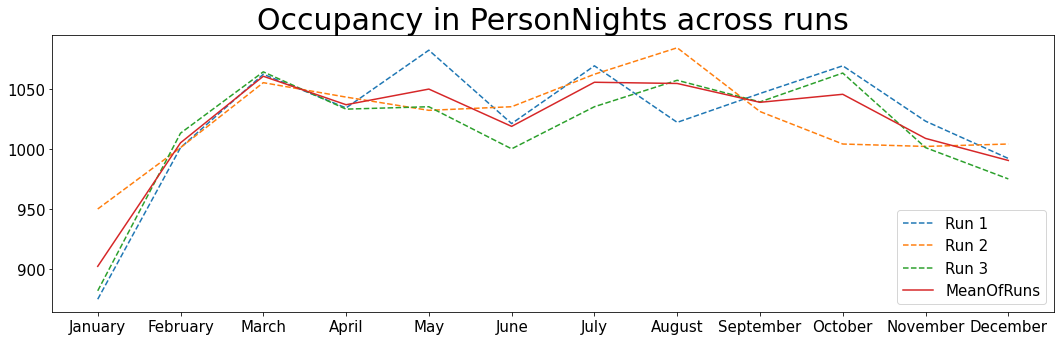

In [198]:
## Visualize - Over Runs 
# =======================

occ_monthly_mean=occ_monthly_mean.sort_values('month', ascending=True)
occ_monthly1=occ_monthly1.sort_values('month', ascending=True)
occ_monthly2=occ_monthly2.sort_values('month', ascending=True)
occ_monthly3=occ_monthly3.sort_values('month', ascending=True)


titlestr = 'Occupancy in PersonNights across runs'
plt.title(titlestr,fontsize=30)

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
#fig = plt.figure()

plt.plot(occ_monthly1['month'], occ_monthly1['monthly_occupancy'], label = "Run 1", linestyle='dashed')
plt.plot(occ_monthly2['month'], occ_monthly2['monthly_occupancy'], label = "Run 2",linestyle='dashed')
plt.plot(occ_monthly3['month'], occ_monthly3['monthly_occupancy'], label = "Run 3",linestyle='dashed')
plt.plot(occ_monthly_mean['month'], occ_monthly_mean['monthly_occupancy'], label = "MeanOfRuns",ms=30)
occ_monthly_mean
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

# Surplus capacity over time

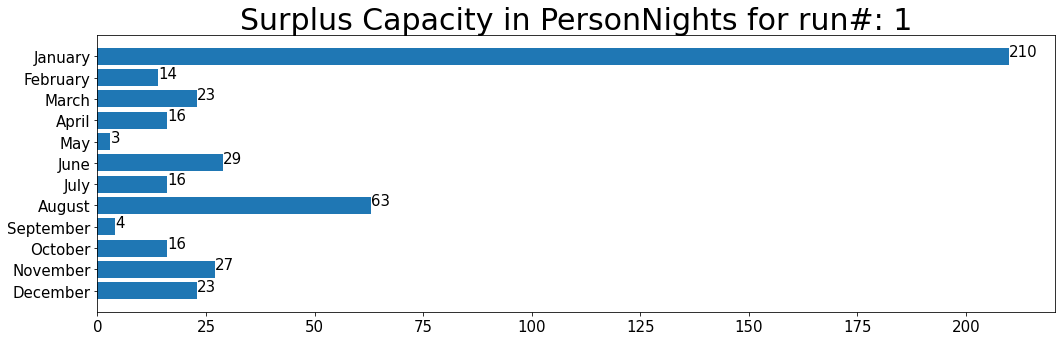

In [199]:
# Prep the data - Surplus capacity over months
# ===========================================

spc_monthly1=run1
spc_monthly2=run2
spc_monthly3=run3

spc_monthly1 = spc_monthly1.groupby(["run_number", "month"]).agg(monthly_spc =("shelter_capacity_left", "sum"))
spc_monthly2 = spc_monthly2.groupby(["run_number", "month"]).agg(monthly_spc =("shelter_capacity_left", "sum"))
spc_monthly3 = spc_monthly3.groupby(["run_number", "month"]).agg(monthly_spc =("shelter_capacity_left", "sum"))


spc_monthly1.reset_index(inplace=True)
spc_monthly2.reset_index(inplace=True)
spc_monthly3.reset_index(inplace=True)

spc_monthlyall = pd.concat([spc_monthly1,spc_monthly2,spc_monthly3])

spc_months1=spc_monthlyall[(spc_monthlyall['run_number'] == 1)]
spc_months2=spc_monthlyall[(spc_monthlyall['run_number'] == 2)]
spc_months3=spc_monthlyall[(spc_monthlyall['run_number'] == 3)] 
                          

months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", \
          "November", "December"]
spc_monthly1['month'] = pd.Categorical(spc_monthly1['month'], categories=months, ordered=True)
spc_monthly1=spc_monthly1.sort_values('month', ascending=False)
spc_monthly2['month'] = pd.Categorical(spc_monthly2['month'], categories=months, ordered=True)
spc_monthly2=spc_monthly2.sort_values('month', ascending=False)
spc_monthly3['month'] = pd.Categorical(spc_monthly3['month'], categories=months, ordered=True)
spc_monthly3=spc_monthly3.sort_values('month', ascending=False)
spc_monthly_mean = spc_monthlyall.groupby(["month"]).agg(monthly_spc =("monthly_spc", "mean"))
spc_monthly_mean['run_number']=0
spc_monthly_mean.reset_index(inplace=True)
spc_monthly_mean['month'] = pd.Categorical(spc_monthly_mean['month'], categories=months, ordered=True)
spc_monthly_mean=spc_monthly_mean.sort_values('month', ascending=False)


## Visualize - Over Months
# ========================

titlestr = 'Surplus Capacity in PersonNights for run#: '+ str(spc_monthly1.loc[1,'run_number'])
plt.title(titlestr,fontsize=30)
plt.barh(spc_monthly1['month'],spc_monthly1['monthly_spc'])
 
for index, value in enumerate(spc_monthly1['monthly_spc']):
    plt.text(value, index,
             str(value))

plt.show()

# Mean surplus Capacity

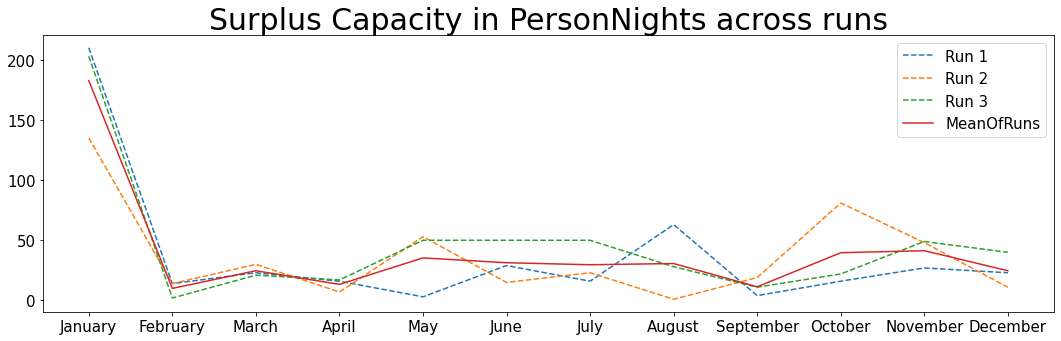

In [200]:
## Visualize - Over Runs 
# =======================

spc_monthly_mean=spc_monthly_mean.sort_values('month', ascending=True)
spc_monthly1=spc_monthly1.sort_values('month', ascending=True)
spc_monthly2=spc_monthly2.sort_values('month', ascending=True)
spc_monthly3=spc_monthly3.sort_values('month', ascending=True)

titlestr = 'Surplus Capacity in PersonNights across runs'
plt.title(titlestr,fontsize=30)

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
#fig = plt.figure()

plt.plot(spc_monthly1['month'], spc_monthly1['monthly_spc'], label = "Run 1", linestyle='dashed')
plt.plot(spc_monthly2['month'], spc_monthly2['monthly_spc'], label = "Run 2",linestyle='dashed')
plt.plot(spc_monthly3['month'], spc_monthly3['monthly_spc'], label = "Run 3",linestyle='dashed')
plt.plot(spc_monthly_mean['month'], spc_monthly_mean['monthly_spc'], label = "MeanOfRuns",ms=50)
occ_monthly_mean
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

# Abuse victims turned away

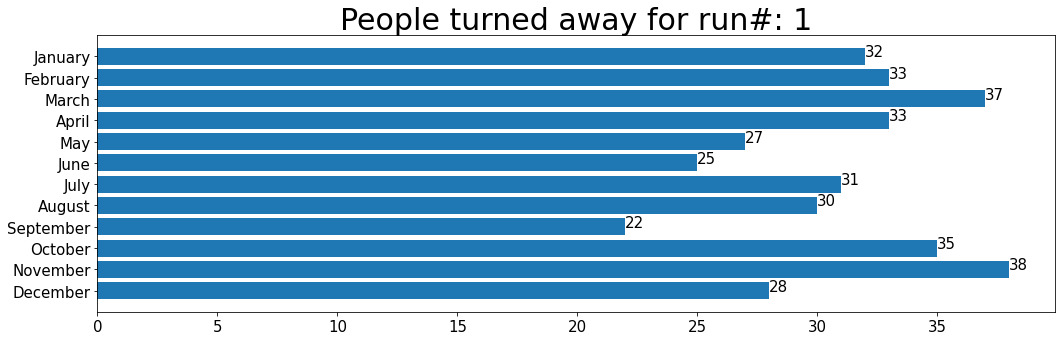

In [201]:
# Prep the data - Abuse victims turned away over months
# ======================================================

avt_monthly1=run1
avt_monthly2=run2
avt_monthly3=run3

avt_monthly1 = avt_monthly1.groupby(["run_number", "month"]).agg(monthly_avt =("ppl_turned_away", "sum"))
avt_monthly2 = avt_monthly2.groupby(["run_number", "month"]).agg(monthly_avt =("ppl_turned_away", "sum"))
avt_monthly3 = avt_monthly3.groupby(["run_number", "month"]).agg(monthly_avt =("ppl_turned_away", "sum"))


avt_monthly1.reset_index(inplace=True)
avt_monthly2.reset_index(inplace=True)
avt_monthly3.reset_index(inplace=True)

avt_monthlyall = pd.concat([avt_monthly1,avt_monthly2,avt_monthly3])

avt_months1=avt_monthlyall[(avt_monthlyall['run_number'] == 1)]
avt_months2=avt_monthlyall[(avt_monthlyall['run_number'] == 2)]
avt_months3=avt_monthlyall[(avt_monthlyall['run_number'] == 3)] 
                          

months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", \
          "November", "December"]
avt_monthly1['month'] = pd.Categorical(avt_monthly1['month'], categories=months, ordered=True)
avt_monthly1=avt_monthly1.sort_values('month', ascending=False)
avt_monthly2['month'] = pd.Categorical(avt_monthly2['month'], categories=months, ordered=True)
avt_monthly2=avt_monthly2.sort_values('month', ascending=False)
avt_monthly3['month'] = pd.Categorical(avt_monthly3['month'], categories=months, ordered=True)
avt_monthly3=avt_monthly3.sort_values('month', ascending=False)
avt_monthly_mean = avt_monthlyall.groupby(["month"]).agg(monthly_avt =("monthly_avt", "mean"))
avt_monthly_mean['run_number']=0
avt_monthly_mean.reset_index(inplace=True)
avt_monthly_mean['month'] = pd.Categorical(avt_monthly_mean['month'], categories=months, ordered=True)
avt_monthly_mean=avt_monthly_mean.sort_values('month', ascending=False)


## Visualize - Over Months
# ========================

titlestr = 'People turned away for run#: '+ str(avt_monthly1.loc[1,'run_number'])
plt.title(titlestr,fontsize=30)
plt.barh(avt_monthly1['month'],avt_monthly1['monthly_avt'])
 
for index, value in enumerate(avt_monthly1['monthly_avt']):
    plt.text(value, index,
             str(value))

plt.show()

# Mean number of abuse victims turned away

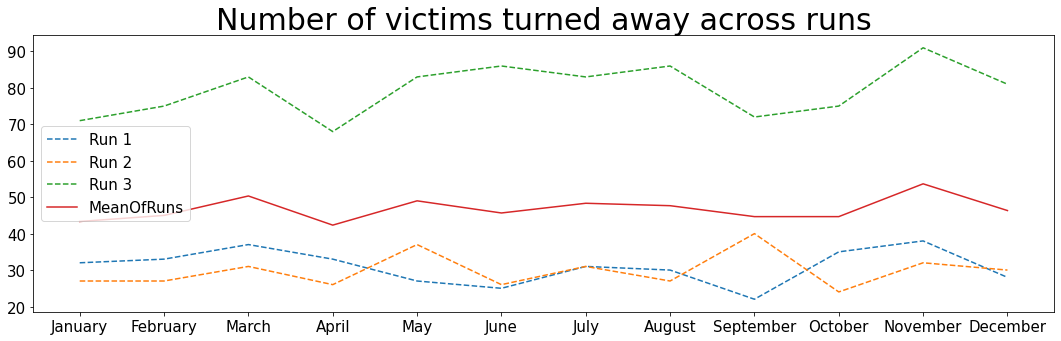

In [204]:
## Visualize - Over Runs 
# =======================

avt_monthly_mean=avt_monthly_mean.sort_values('month', ascending=True)
avt_monthly1=avt_monthly1.sort_values('month', ascending=True)
avt_monthly2=avt_monthly2.sort_values('month', ascending=True)
avt_monthly3=avt_monthly3.sort_values('month', ascending=True)

titlestr = 'Number of victims turned away across runs'
plt.title(titlestr,fontsize=30)

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
#fig = plt.figure()

plt.plot(avt_monthly1['month'], avt_monthly1['monthly_avt'], label = "Run 1", linestyle='dashed')
plt.plot(avt_monthly2['month'], avt_monthly2['monthly_avt'], label = "Run 2",linestyle='dashed')
plt.plot(avt_monthly3['month'], avt_monthly3['monthly_avt'], label = "Run 3",linestyle='dashed')
plt.plot(avt_monthly_mean['month'], avt_monthly_mean['monthly_avt'], label = "MeanOfRuns",ms=50)
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

# Victims sent to hotels

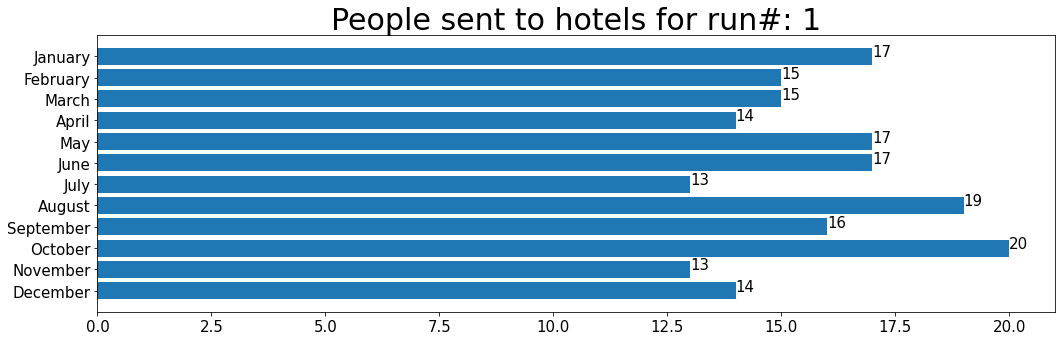

In [205]:
# Prep the data - Abuse victims turned away over months
# ======================================================

vsh_monthly1=run1
vsh_monthly2=run2
vsh_monthly3=run3

vsh_monthly1 = vsh_monthly1.groupby(["run_number", "month"]).agg(monthly_vsh =("sent_to_hotel", "sum"))
vsh_monthly2 = vsh_monthly2.groupby(["run_number", "month"]).agg(monthly_vsh =("sent_to_hotel", "sum"))
vsh_monthly3 = vsh_monthly3.groupby(["run_number", "month"]).agg(monthly_vsh =("sent_to_hotel", "sum"))


vsh_monthly1.reset_index(inplace=True)
vsh_monthly2.reset_index(inplace=True)
vsh_monthly3.reset_index(inplace=True)

vsh_monthlyall = pd.concat([vsh_monthly1,vsh_monthly2,vsh_monthly3])

vsh_months1=vsh_monthlyall[(vsh_monthlyall['run_number'] == 1)]
vsh_months2=vsh_monthlyall[(vsh_monthlyall['run_number'] == 2)]
vsh_months3=vsh_monthlyall[(vsh_monthlyall['run_number'] == 3)] 
                          

months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", \
          "November", "December"]
vsh_monthly1['month'] = pd.Categorical(vsh_monthly1['month'], categories=months, ordered=True)
vsh_monthly1=vsh_monthly1.sort_values('month', ascending=False)
vsh_monthly2['month'] = pd.Categorical(vsh_monthly2['month'], categories=months, ordered=True)
vsh_monthly2=vsh_monthly2.sort_values('month', ascending=False)
vsh_monthly3['month'] = pd.Categorical(vsh_monthly3['month'], categories=months, ordered=True)
vsh_monthly3=vsh_monthly3.sort_values('month', ascending=False)
vsh_monthly_mean = vsh_monthlyall.groupby(["month"]).agg(monthly_vsh =("monthly_vsh", "mean"))
vsh_monthly_mean['run_number']=0
vsh_monthly_mean.reset_index(inplace=True)
vsh_monthly_mean['month'] = pd.Categorical(vsh_monthly_mean['month'], categories=months, ordered=True)
vsh_monthly_mean=vsh_monthly_mean.sort_values('month', ascending=False)


## Visualize - Over Months
# ========================

titlestr = 'People sent to hotels for run#: '+ str(vsh_monthly1.loc[1,'run_number'])
plt.title(titlestr,fontsize=30)
plt.barh(vsh_monthly1['month'],vsh_monthly1['monthly_vsh'])
 
for index, value in enumerate(vsh_monthly1['monthly_vsh']):
    plt.text(value, index,
             str(value))

plt.show()

# Mean number of victims sent to hotels

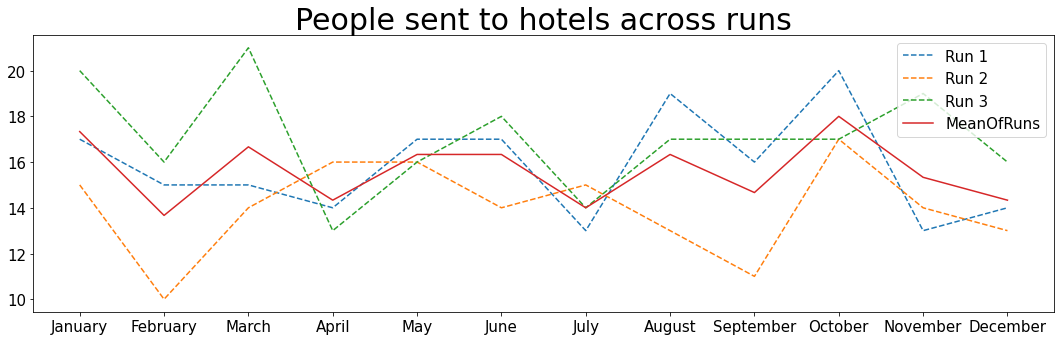

In [206]:
## Visualize - Over Runs 
# =======================


vsh_monthly_mean=vsh_monthly_mean.sort_values('month', ascending=True)
vsh_monthly1=vsh_monthly1.sort_values('month', ascending=True)
vsh_monthly2=vsh_monthly2.sort_values('month', ascending=True)
vsh_monthly3=vsh_monthly3.sort_values('month', ascending=True)

titlestr = 'People sent to hotels across runs'
plt.title(titlestr,fontsize=30)

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
#fig = plt.figure()

plt.plot(vsh_monthly1['month'], vsh_monthly1['monthly_vsh'], label = "Run 1", linestyle='dashed')
plt.plot(vsh_monthly2['month'], vsh_monthly2['monthly_vsh'], label = "Run 2",linestyle='dashed')
plt.plot(vsh_monthly3['month'], vsh_monthly3['monthly_vsh'], label = "Run 3",linestyle='dashed')
plt.plot(vsh_monthly_mean['month'], vsh_monthly_mean['monthly_vsh'], label = "MeanOfRuns",ms=50)
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()